In [163]:
import pandas as pd
from random import choice

In [164]:
cases_text_onlyspeaker_df = pd.read_csv("cases_text_onlyspeaker.csv")
cases_text_onlyspeaker_df.head()

,new_name,sentence,sentence_clean,topic_mentioned,sentiment,prob_score_neg,prob_score_neutral,prob_score_pos,has_parking,has_econactivity,...,sent_voice_mentioned,sentpol_voice_mentioned,prob_pos_voice_mentioned,prob_neg_voice_mentioned,positive_voice_mentioned,negative_voice_mentioned,num_voice_mentioned,num_sentences,sentence_lower,count_my_name
0,09-12-2017audio_6ZA-2017-210-CU-1A,My name is Jerry Newman.,My name is Jerry Newman.,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,my name is jerry newman.,1
1,09-12-2017audio_6ZA-2017-210-CU-1A,"Thank you, President Chunkham, members of the ...","Thank you, President Chunkham, members of the ...",NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,"thank you, president chunkham, members of the ...",0
2,09-12-2017audio_6ZA-2017-210-CU-1A,The question that is asked and that was asked ...,The question that is asked and that was asked ...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,the question that is asked and that was asked ...,0
3,09-12-2017audio_6ZA-2017-210-CU-1A,And I think Mr. Chang made an adequate descrip...,And I think Mr. Chang made an adequate descrip...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,and i think mr. chang made an adequate descrip...,0
4,09-12-2017audio_6ZA-2017-210-CU-1A,We started thinking through a business plan an...,We started thinking through a business plan an...,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,we started thinking through a business plan an...,0


Parking Example Sentences

In [165]:
parking_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_parking'] == 1]
random_parking_rows = parking_rows.sample(n=10)
random_parking_sentences = random_parking_rows["sentence"].tolist()
random_parking_sentences

['I think in the parking lot, its probably, but I dont like the idea of them doing it during the really busy hours.',
 'Please note that these seven spaces shown the permit are the same seven spaces required to be maintained as on-site parking by EVA restaurantpursuant to the provisions of the certificate of occupancy attaches Exhibit C, thus it appears that according to LADBS records that both BLD restaurant located at 7450 Beverly Boulevard and of the restaurant located 7458 Beverly Boulevard are controlled and regulated by the same certificate of occupancy issued in 1998.',
 'So the the the the the the the the the the the the the the the the the the the The parking is an open during lunch hour?',
 'Lets start with parking.',
 'So we did condition that the parking levels be screened.',
 'Theres no questioncustomers have complained, theres no proof theres people parking on the street and its permit parking.',
 'And then thats when everyone is sort parking lot.',
 'The reason we are se

Nuisance Example Sentences

In [166]:
nuisance_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_nuisance'] == 1]
random_nuisance_rows = parking_rows.sample(n=10)
random_nuisance_sentences = random_parking_rows["sentence"].tolist()
random_nuisance_sentences

['I think in the parking lot, its probably, but I dont like the idea of them doing it during the really busy hours.',
 'Please note that these seven spaces shown the permit are the same seven spaces required to be maintained as on-site parking by EVA restaurantpursuant to the provisions of the certificate of occupancy attaches Exhibit C, thus it appears that according to LADBS records that both BLD restaurant located at 7450 Beverly Boulevard and of the restaurant located 7458 Beverly Boulevard are controlled and regulated by the same certificate of occupancy issued in 1998.',
 'So the the the the the the the the the the the the the the the the the the the The parking is an open during lunch hour?',
 'Lets start with parking.',
 'So we did condition that the parking levels be screened.',
 'Theres no questioncustomers have complained, theres no proof theres people parking on the street and its permit parking.',
 'And then thats when everyone is sort parking lot.',
 'The reason we are se

Affordable Housing Example Sentences

In [167]:
affordablehousing_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_affordablehousing'] == 1]
random_affordablehousing_rows = parking_rows.sample(n=10)
random_affordablehousing_sentences = random_parking_rows["sentence"].tolist()
random_affordablehousing_sentences

['I think in the parking lot, its probably, but I dont like the idea of them doing it during the really busy hours.',
 'Please note that these seven spaces shown the permit are the same seven spaces required to be maintained as on-site parking by EVA restaurantpursuant to the provisions of the certificate of occupancy attaches Exhibit C, thus it appears that according to LADBS records that both BLD restaurant located at 7450 Beverly Boulevard and of the restaurant located 7458 Beverly Boulevard are controlled and regulated by the same certificate of occupancy issued in 1998.',
 'So the the the the the the the the the the the the the the the the the the the The parking is an open during lunch hour?',
 'Lets start with parking.',
 'So we did condition that the parking levels be screened.',
 'Theres no questioncustomers have complained, theres no proof theres people parking on the street and its permit parking.',
 'And then thats when everyone is sort parking lot.',
 'The reason we are se

Neighborhood Character Example Sentences

In [168]:
nhood_character_rows = cases_text_onlyspeaker_df[cases_text_onlyspeaker_df['has_nhood_character'] == 1]
random_nhood_character_rows = parking_rows.sample(n=10)
random_nhood_character_sentences = random_parking_rows["sentence"].tolist()
random_nhood_character_sentences

['I think in the parking lot, its probably, but I dont like the idea of them doing it during the really busy hours.',
 'Please note that these seven spaces shown the permit are the same seven spaces required to be maintained as on-site parking by EVA restaurantpursuant to the provisions of the certificate of occupancy attaches Exhibit C, thus it appears that according to LADBS records that both BLD restaurant located at 7450 Beverly Boulevard and of the restaurant located 7458 Beverly Boulevard are controlled and regulated by the same certificate of occupancy issued in 1998.',
 'So the the the the the the the the the the the the the the the the the the the The parking is an open during lunch hour?',
 'Lets start with parking.',
 'So we did condition that the parking levels be screened.',
 'Theres no questioncustomers have complained, theres no proof theres people parking on the street and its permit parking.',
 'And then thats when everyone is sort parking lot.',
 'The reason we are se

What people tend to talk about Parking with

In [169]:
all_parking_sentences = parking_rows["sentence"].tolist()
len(all_parking_sentences)

7922

In [170]:
# from sentence_transformers import SentenceTransformer


# sentences = all_parking_sentences
# model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# embeddings = model.encode(sentences)

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [172]:



# # Sample list of sentences about parking
# sentences = all_parking_sentences

# # Step 1: Preprocess and vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(sentences)


# wcss = []  # Within-cluster sum of squares

# # Calculate WCSS for different values of k
# k_to_test = 100
# for i in range(1, k_to_test):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# # Step 3: Plot the Elbow Method results
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, k_to_test), wcss, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
# plt.show()





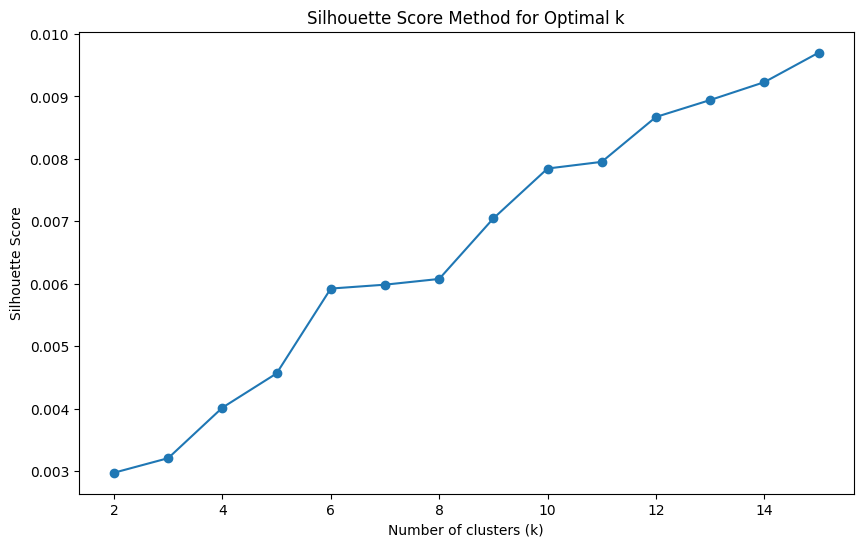

In [173]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Sample list of sentences about parking
sentences = all_parking_sentences

# Step 1: Preprocess and vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

silhouette_scores = []

# Calculate silhouette scores for different values of k
k_to_test = 16
for i in range(2, k_to_test):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Step 3: Plot the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, k_to_test), silhouette_scores, marker='o')
plt.title('Silhouette Score Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [174]:
# Step 2: Apply K-Means clustering
num_clusters = 14  # Set the number of clusters you want
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Step 3: Assign each sentence to a cluster
clusters = kmeans.labels_

# Step 4: Create a DataFrame to view the results
clustered_sentences = pd.DataFrame({'Sentence': sentences, 'Cluster': clusters})

# Display the clusters
print(clustered_sentences)

                                               Sentence  Cluster
0     The reason for this is its impractical to do t...        0
1     We have the existing accesses on the far right...        9
2     Currently you have on the lower left office bu...        7
3     Itll replace the surface parking lot with almo...        2
4     And it replaces importantly a surface level pa...        0
...                                                 ...      ...
7917  I would say that the ground floor parking as L...        8
7918  Id like to make a motion to approve staffs rec...        9
7919  Permanently on bundling of the parking spaces ...        9
7920  As such, condition 3B to be modified, the proj...       12
7921  Parking spaces for restricted affordable units...       12

[7922 rows x 2 columns]


In [175]:
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    example_sentences = clustered_sentences[clustered_sentences['Cluster'] == i]['Sentence'].sample(4)
    for sentence in example_sentences:
        print(f"- {sentence}")


Cluster 0:
- This is an enterprise zone which reduces the parking ratios, but we further reduce those ratios with a shared parking request for a total of about 3,000 300 spaces that full build out for a million square foot project.
- So the points that I was saying when I said by right, I meant, for instance, the number of parking spaces, the conditions of construction are all per the code for this type of project.
- The other thing Id like to address is that its unusual for us to want to support a project that has an exposed parking garage on the on the streets.
- If you look in the Conno Conversion section of the code, you can see the link in the There are provisions for alternative parking requirements that the advisory agency can apply for Condo Commersion Project and that was what the advisory agency wasagency relied on in determining how many parking spaces are required for a project like this.

Cluster 1:
- Actually, you tried to grant the appeal without the required parking sp

In [176]:
cluster_counts = clustered_sentences['Cluster'].value_counts().sort_index()

for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num}: {count} sentences")

"""
cluster 0: 
cluster 1: 
cluster 2: 
cluster 3: 
cluster 4: 
cluster 5:
cluster 6:
cluster 7: 
cluser 8:
cluster 9:
cluster 10:
cluster 11:
cluster 12:
cluster 13:
cluster 14:

"""

Cluster 0: 367 sentences
Cluster 1: 266 sentences
Cluster 2: 470 sentences
Cluster 3: 196 sentences
Cluster 4: 163 sentences
Cluster 5: 336 sentences
Cluster 6: 292 sentences
Cluster 7: 482 sentences
Cluster 8: 659 sentences
Cluster 9: 3378 sentences
Cluster 10: 286 sentences
Cluster 11: 174 sentences
Cluster 12: 451 sentences
Cluster 13: 402 sentences


'\ncluster 0: \ncluster 1: \ncluster 2: \ncluster 3: \ncluster 4: \ncluster 5:\ncluster 6:\ncluster 7: \ncluser 8:\ncluster 9:\ncluster 10:\ncluster 11:\ncluster 12:\ncluster 13:\ncluster 14:\n\n'

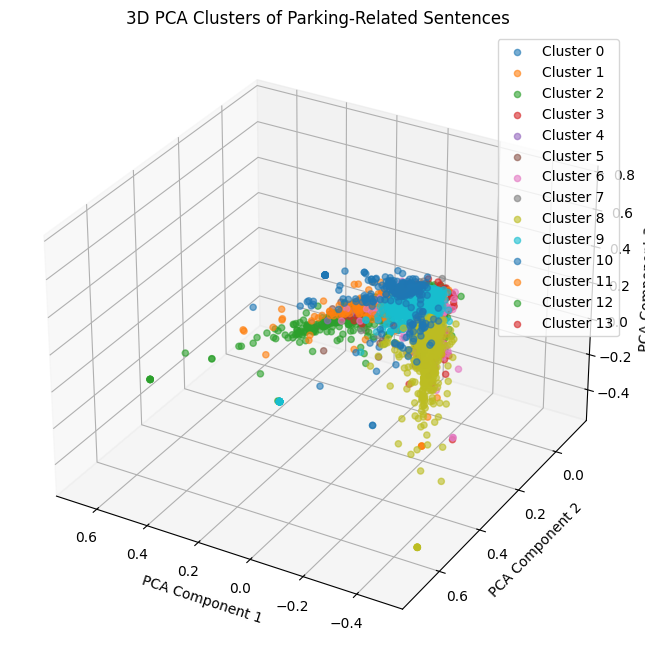

In [177]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Step 6: Reduce dimensionality with PCA for 3D visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Step 7: Plot the clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']  # Colors for the clusters

for i in range(num_clusters):
    points = X_pca[clusters == i]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], label=f'Cluster {i}', alpha=0.6)

ax.view_init(elev=30, azim=120)


ax.set_title("3D PCA Clusters of Parking-Related Sentences")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.show()

In [178]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from collections import defaultdict

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(sentences)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


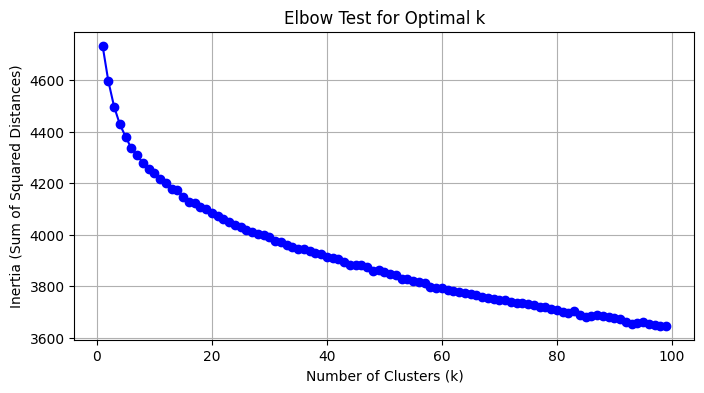

In [212]:
# Perform the Elbow Test
inertias = []
k_values = range(1, 50)  # You can adjust the range as needed

for k in k_values:
    clustering_model = KMeans(n_clusters=k, random_state=0)
    clustering_model.fit(embeddings)
    inertias.append(clustering_model.inertia_)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Test for Optimal k')
plt.grid(True)
plt.show()

In [263]:
# Perform K-Means clustering
num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clustering_model.fit(embeddings)
clusters = clustering_model.labels_

# Interpret the clusters
# clusters = defaultdict(list)
# for sentence, cluster_id in zip(sentences, cluster_assignments):
#     clusters[cluster_id].append(sentence)

# for cluster_id, cluster_sentences in clusters.items():
#     print(f"Cluster {cluster_id}:")
#     for sentence in cluster_sentences:
#         print(f"  - {sentence}")


# # Step 2: Apply K-Means clustering
# num_clusters = 14  # Set the number of clusters you want
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# kmeans.fit(X)

# # Step 3: Assign each sentence to a cluster
# clusters = kmeans.labels_

# Step 4: Create a DataFrame to view the results
clustered_sentences = pd.DataFrame({'Sentence': sentences, 'Cluster': clusters})

# Display the clusters
# print(clustered_sentences)

In [266]:
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    example_sentences = clustered_sentences[clustered_sentences['Cluster'] == i]['Sentence'].sample(4)
    for sentence in example_sentences:
        print(f"- {sentence}")


Cluster 0:
- This is my client fileto do some interior work and reconfigure the front of what we believe and haveand has been confirmed is my clients property to move some of the parking spaces around to for better circulationfor better landscaping, but theres no extra valuefloor area thats being added and theres no floor area thats being proposed.
- Number two, it is allowing the project to have essentially no additional parking, even though for condominium.
- Seven years ago when Millennium and its partner, Argin Ventures, were presented with the option to acquire the capital records building and the 4.5 acres of surface parking lots next to and across Vine Street.
- I think that moving the APM up and around the theme building to curve around there, spreading the columnsfarthest things apart having the smooth design is the are the walkways that are going from the station that it stops at are they actually other ones near the theme building are they actually immediately adjacent expl

In [264]:
cluster_counts = clustered_sentences['Cluster'].value_counts().sort_index()

# for cluster_num, count in cluster_counts.items():
#     print(f"Cluster {cluster_num}: {count} sentences")

total_sentences = cluster_counts.sum()

for cluster_num, count in cluster_counts.items():
    percentage = (count / total_sentences) * 100
    print(f"Cluster {cluster_num}: {percentage:.2f}% of sentences")

"""
cluster 0: aesthetics, parking placement relative to residential areas and site development
cluster 1: 
cluster 2: *concern about lack of parking
cluster 3: *issues and inadequacies of parking on community
cluster 4: 
cluster 5: *beauracracy, compliance with regulations, application
cluster 6: 
cluster 7: *specific amount parking space requirements

"""

Cluster 0: 12.12% of sentences
Cluster 1: 10.67% of sentences
Cluster 2: 5.28% of sentences
Cluster 3: 13.19% of sentences
Cluster 4: 14.88% of sentences
Cluster 5: 15.00% of sentences
Cluster 6: 16.47% of sentences
Cluster 7: 12.40% of sentences


'\ncluster 0: aesthetics, parking placement relative to residential areas and site development\ncluster 1: \ncluster 2: *concern about lack of parking\ncluster 3: *issues and inadequacies of parking on community\ncluster 4: \ncluster 5: *beauracracy, compliance with regulations, application\ncluster 6: \ncluster 7: *specific amount parking space requirements\n\n'

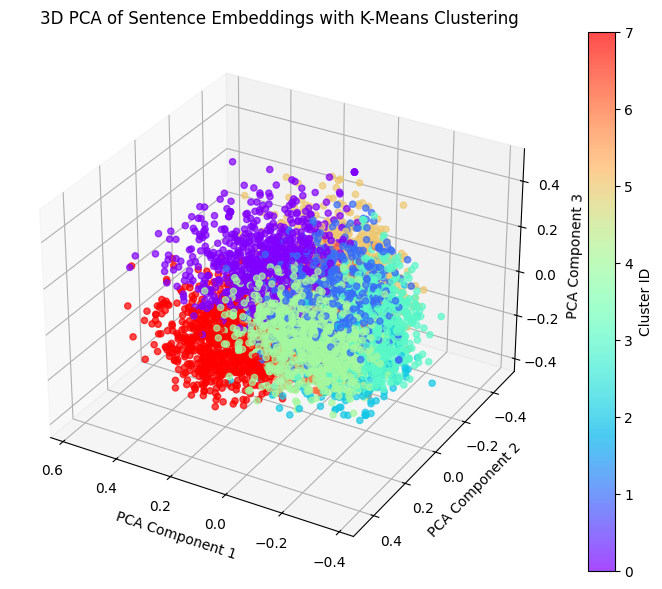

In [265]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D



pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=clusters, cmap='rainbow', alpha=0.7)
ax.view_init(elev=30, azim=120)


ax.set_title('3D PCA of Sentence Embeddings with K-Means Clustering')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(scatter, ax=ax, label='Cluster ID')
plt.show()